# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

From a data science perspective, the business objective of identifying key price drivers for used cars translates to a **supervised learning task**. Specifically, we will employ **regression modeling** to address this problem.  The goal is to construct a **data-driven model** capable of predicting used car prices based on a set of **input features**. These features, acting as **independent variables**, will encompass car attributes such as mileage, manufacturing year, vehicle type, and condition. The used car price itself will serve as the **dependent variable**. Through rigorous **regression analysis**, we aim to not only develop an accurate price prediction model but also to derive **actionable insights** into the relative influence of each feature on used car valuations. This will allow us to quantitatively determine the most significant factors driving price fluctuations in the used car market.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

```markdown
### Data Understanding Steps

**1. Load Data and Initial Inspection:**

Load the data into a pandas DataFrame to explore it further.  Examine the first few rows and last few rows of the CSV to get a sense of the data structure, variable types, and potential outliers. Check for nulls or missing values, potential outliers, duplicates, and whether the data "feels right"—is it a valid dataset to answer our questions? Does it include critical fields, or does it look "wrong"? For example, for our purposes, I expect data related to used cars in some relevant manner. I expect it to have sufficient data, sources, and make sense from experience. If the data does not include mileage but has weather information, the dataset is incomplete at best, useless at worst.

**2. Data Profiling and Validation:**

Generate summary statistics for each column (mean, median, standard deviation, min, max, number of unique values, number of missing values, data types). This will help identify potential outliers and data inconsistencies. Validate that the data types in each column are consistent. Note non-numeric columns that may be relevant; we will have to handle these differently.

**3. Missing Data Handling:**

Check for missing data and determine if it can be fixed via imputation or removal. See what percent of data is missing, if there's a pattern to the missing data, and if it makes sense to include it in our analysis.

**4. Outlier Handling:**

Identify outliers using box plots, scatter plots, or z-scores. Handle outliers by removal or transformation.

**5. Duplicate Handling:**

Identify and handle duplicate rows by removal or merging.

```

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/vehicles.csv")

df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
df.iloc[15:31]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
15,7223509794,bellingham,13995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
16,7222753076,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
17,7222206015,bellingham,21850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
18,7220030122,bellingham,26850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
19,7218423006,bellingham,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
20,7216672204,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
21,7215617048,bellingham,21850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
22,7213839225,bellingham,26850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
23,7208549803,bellingham,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
24,7213843538,skagit / island / SJI,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa


In [6]:
#lets get some stats
print(df.describe().round(2).astype(str))
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Identify columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index.tolist()

# Print the percentage of missing values for each column
print("Percentage of missing values for each column:\n", missing_percentage)

# how many values in cylinders are missing, and dont follow the pattern: "number text" like "8 cylinders"
# Count missing values (NaN or None)
missing_values = df['cylinders'].isna().sum()

# If empty strings are considered missing, include them
empty_strings = (df['cylinders'] == '').sum()
total_missing = missing_values + empty_strings

print(f"Missing values in 'cylinders': {total_missing}")




                  id         price      year    odometer
count       426880.0      426880.0  425675.0    422480.0
mean   7311486634.22      75199.03   2011.24    98043.33
std       4473170.41   12182282.17      9.45    213881.5
min     7207408119.0           0.0    1900.0         0.0
25%    7308143339.25        5900.0    2008.0     37704.0
50%     7312620821.0       13950.0    2013.0     85548.0
75%     7315253543.5      26485.75    2017.0    133542.5
max     7317101084.0  3736928711.0    2022.0  10000000.0
Percentage of missing values for each column:
 id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.50107

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [7]:
# drop columns that dont matter for price: VIN
df = df.drop("VIN", axis=1)

# drop id
df = df.drop('id', axis=1)

#drop size since it has ~72% absent values
df = df.drop('size', axis=1)

# drop model - from the raw data, plots and data consistency checks, we this data is randomly entered and not needed; in fact it makes it worse
df = df.drop("model", axis=1)

# >96% of titles are clean, we can drop that column for our purposes
df = df.drop("title_status", axis=1)

#vast majority of type (76%+) are of the top 4 types: sedan, SUV, pickup, truck. Combine all else with other - reduce cardinality
top_4_types = ['sedan', 'SUV', 'pickup', 'truck']
# Combine all but top 4 into 'other'
df['type'] = df['type'].where(df['type'].isin(top_4_types), 'other')
df['type'].value_counts(normalize=True) * 100

df.columns

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

In [8]:
# cylinders is an important feature for us and is a mixed set between numbers and text. Lets figure out the cylinders column
# check for nan, extract numbers, check for relationship between fuel (gas/electric/hybrid...) and cylinders
# plan:
# Extract cylinders to numbers
# For NaN cylinder values:
#   set 0 if fuel is electric
#   set to mode based on type of vehicle
#   if any still remain, set to overall mode

import re
# Define the regex pattern for "number text" (e.g., "8 cylinders")
pattern = r'^(\d+)\s+\w+$'  # Captures the number in group 1

def extract_number(value):
    # Check for NaN or empty string
    if pd.isna(value) or value == '':
        return value
    # Convert to string for regex
    value_str = str(value)
    # Try to match the pattern
    match = re.match(pattern, value_str)
    if match:
        # Return the number (as string or int, depending on preference)
        return int(match.group(1))  # Extract number as integer
    # For non-matching values, return NaN (or customize as needed)
    return np.nan

df['cylinders_extracted'] = df['cylinders'].apply(extract_number)
df = df.drop('cylinders', axis=1)
cylinder_counts = df['cylinders_extracted'].value_counts(dropna=False).reset_index()
cylinder_counts.columns = ['cylinders_extracted', 'count']
print(f"Post cyl extraction\n {cylinder_counts}")

# check for fuel
df['cylinders_extracted'] = np.where(
    (df['fuel'] == 'electric'),
    0,
    df['cylinders_extracted']
    )

# set for type
group_cols = ['type']
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(
    df.groupby('type')['cylinders_extracted'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

#just mode the remaining
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(df['cylinders_extracted'].mode()[0])

# check again
cylinder_counts = df['cylinders_extracted'].value_counts(dropna=False).reset_index()
cylinder_counts.columns = ['cylinders_extracted', 'count']
print(f"Post cyl extraction\n {cylinder_counts}")

# reset col name back to cylinders
df.rename(columns={'cylinders_extracted': 'cylinders'}, inplace=True)


Post cyl extraction
    cylinders_extracted   count
0                  NaN  178976
1                  6.0   94169
2                  4.0   77642
3                  8.0   72062
4                  5.0    1712
5                 10.0    1455
6                  3.0     655
7                 12.0     209
Post cyl extraction
    cylinders_extracted   count
0                  6.0  219356
1                  4.0  107012
2                  8.0   94784
3                  5.0    1712
4                  0.0    1698
5                 10.0    1455
6                  3.0     654
7                 12.0     209


In [9]:
# fix nans in numerical cols
print(df.columns)
numerical_cols = ['year','odometer','cylinders']

# year has 0.282281% missing values- lets drop them
#odometer has 1.030735% missing vlaues - lets drop them
# we dont have any nan cylinders, but for completeness, lets clean up
df = df.dropna(subset=numerical_cols)


Index(['region', 'price', 'year', 'manufacturer', 'condition', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'cylinders'],
      dtype='object')


In [10]:
print(df.info())

len(df['odometer'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 421344 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        421344 non-null  object 
 1   price         421344 non-null  int64  
 2   year          421344 non-null  float64
 3   manufacturer  405077 non-null  object 
 4   condition     250851 non-null  object 
 5   fuel          419172 non-null  object 
 6   odometer      421344 non-null  float64
 7   transmission  419649 non-null  object 
 8   drive         292495 non-null  object 
 9   type          421344 non-null  object 
 10  paint_color   293254 non-null  object 
 11  state         421344 non-null  object 
 12  cylinders     421344 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 45.0+ MB
None


104630

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'cylinders'],
      dtype='object')

Mean and Median Price by year:
               mean     median  count
year                                 
1960.0  16480579.08    11997.5    120
1989.0   2478352.93     6400.0    571
2000.0   1705719.64     4463.5   3562
1902.0   1666666.00  1666666.0      1
1999.0   1625633.49     4995.0   3074
2021.0   1365090.25    23998.0   2348
1980.0    428606.43     7997.5    272
1965.0    359413.08    14500.0    365
2007.0    264293.57     6500.0  14693
1993.0    150012.40     5100.0    711


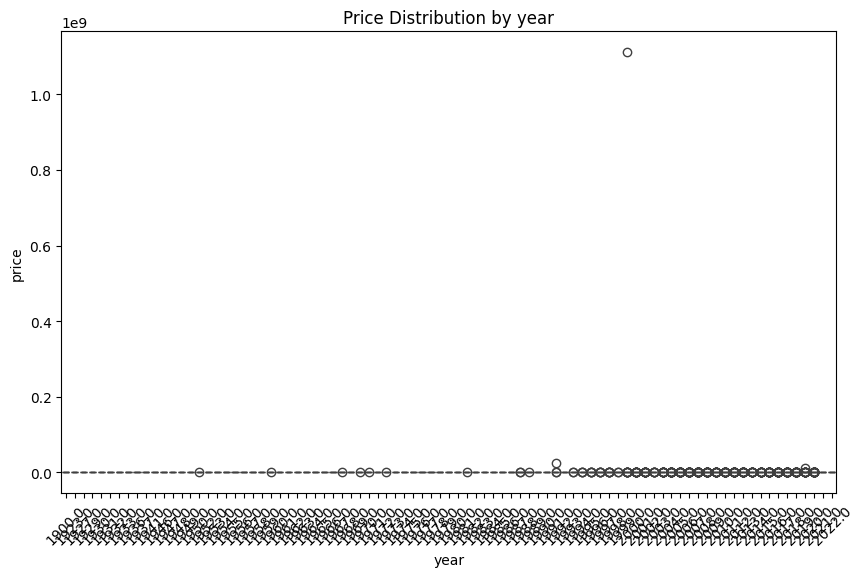


Mean and Median Price by odometer:
                  mean      median  count
odometer                                 
64181.0    61730794.50  61730794.5      2
211000.0   27087537.54      5898.5    138
9999999.0  11227718.78      2500.0     88
164000.0    9102742.37      6700.0    411
110500.0    7953192.53     10295.0     17
1000.0      6044806.38      6000.0    683
1234567.0   4578341.78      3750.0     27
320000.0    4264704.59      6000.0     29
999999.0    4237645.98     10999.0    234
103000.0    2831866.34      8995.0    500


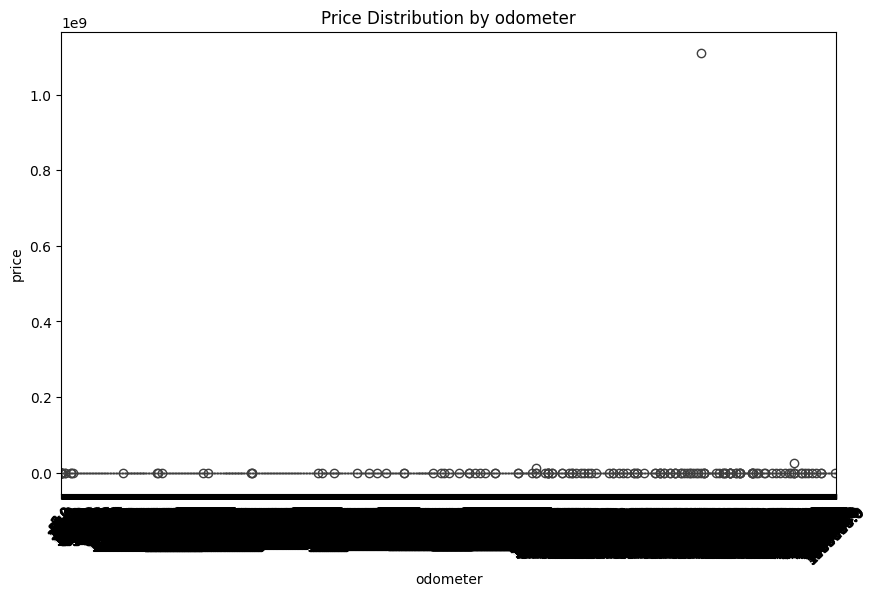


Mean and Median Price by cylinders:
                mean   median   count
cylinders                            
8.0        114185.79  22000.0   93786
6.0         91451.03  14000.0  216428
12.0        54860.99  28990.0     203
0.0         24703.07  22683.5    1690
10.0        21392.01  14995.0    1436
4.0         13357.59   9900.0  105460
3.0         12429.59   9990.0     641
5.0          7859.68   6250.0    1700


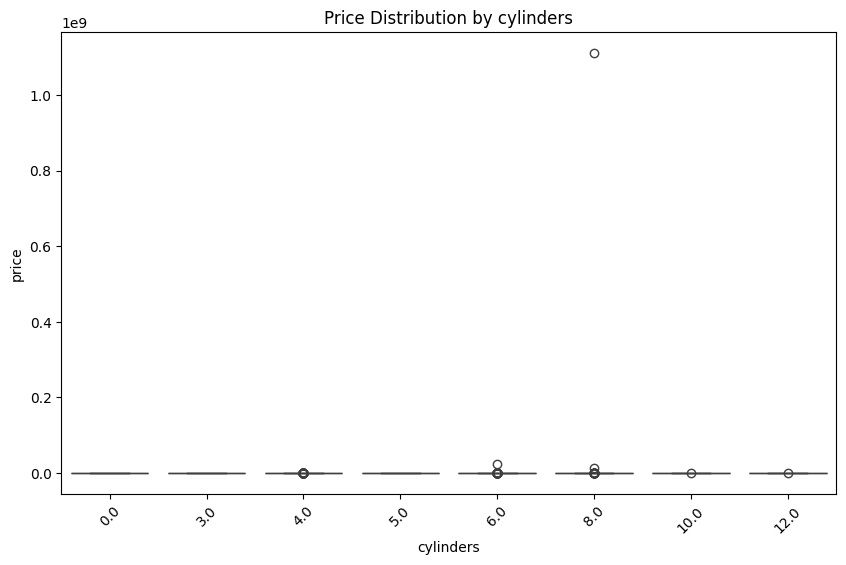

'results:\nwe see year is too many unique values and likely needs to be derived as age and use log scale\nwe see odometer is also too many values and fails to plot. We nede to bin it.\nwe see cylinders plotting well'

In [11]:
# lets check price distribution for numerical cols
print(df.columns)

import matplotlib.pyplot as plt
import seaborn as sns


for col in numerical_cols:
    print(f"\nMean and Median Price by {col}:")
    group_stats = df.groupby(col)['price'].agg(['mean', 'median', 'count']).round(2).sort_values('mean', ascending=False)

    print(group_stats.head(10))
    plt.figure(figsize=(10, 6))
    df_sampled = df.sample(n=10000, random_state=1) if len(df) > 10000 else df #Fixed the loop to sample data instead of full df. Fails with full load
    sns.boxplot(x=col, y='price', data=df_sampled)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

"""results:
we see year is too many unique values and likely needs to be derived as age and use log scale
we see odometer is also too many values and fails to plot. We nede to bin it.
we see cylinders plotting well"""



In [12]:
from sklearn.preprocessing import KBinsDiscretizer

def bin_plot(df, col:str, n_bins=10):

    # Initialize discretizer: 10 bins, ordinal output, uniform bin width
    kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

    # Fit and transform odometer column (must reshape for 2D input)
    bin_col = col+"_binned"

    df[bin_col] = kbins.fit_transform(df[[col]]).astype(int)

    bin_edges = kbins.bin_edges_[0]
    bin_labels = [f"{int(bin_edges[i])}–{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

    # Map binned values to readable labels
    df[bin_col+"_label"] = df[bin_col].map(dict(enumerate(bin_labels)))

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=bin_col+"_label", y='price', data=df)

    plt.yscale('log')  # Logarithmic scale for price
    plt.title(f'Price Distribution by {col} (Log Scale)')
    plt.xlabel(f'{col} of Vehicle')
    plt.ylabel('Price (Log Scale)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


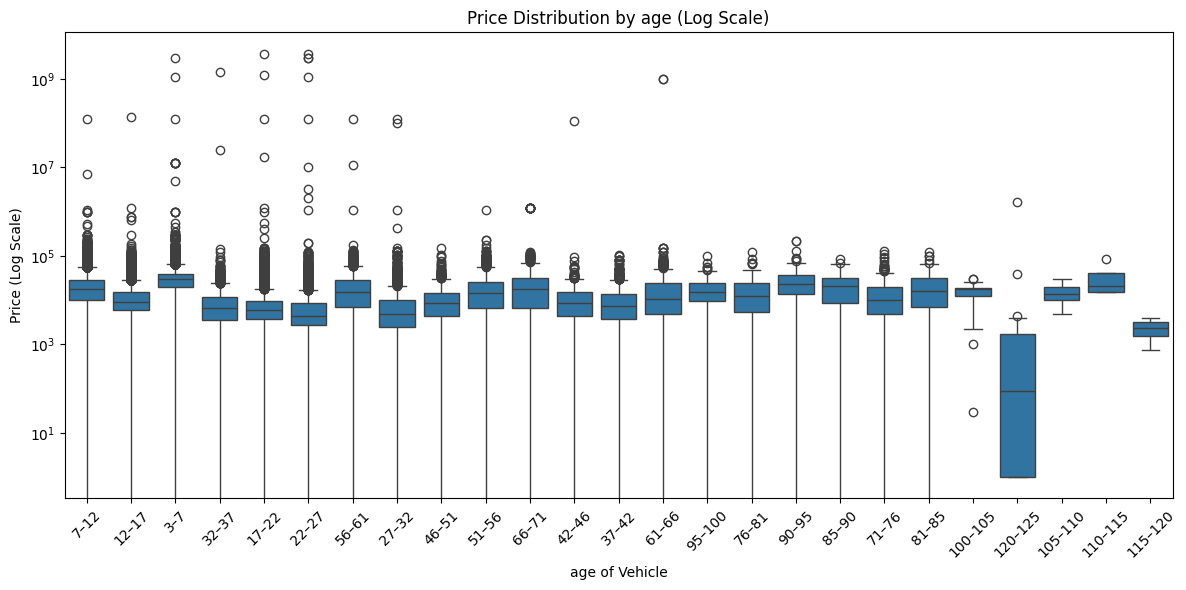

In [13]:
#derive age from year and lets check log scale
# results its still a messy graph - lets bin it and see ff we get outliers we can remove
import datetime

df['age'] = datetime.datetime.now().year - df['year']
df = df.drop('year', axis = 1)

bin_plot(df, 'age', 25)



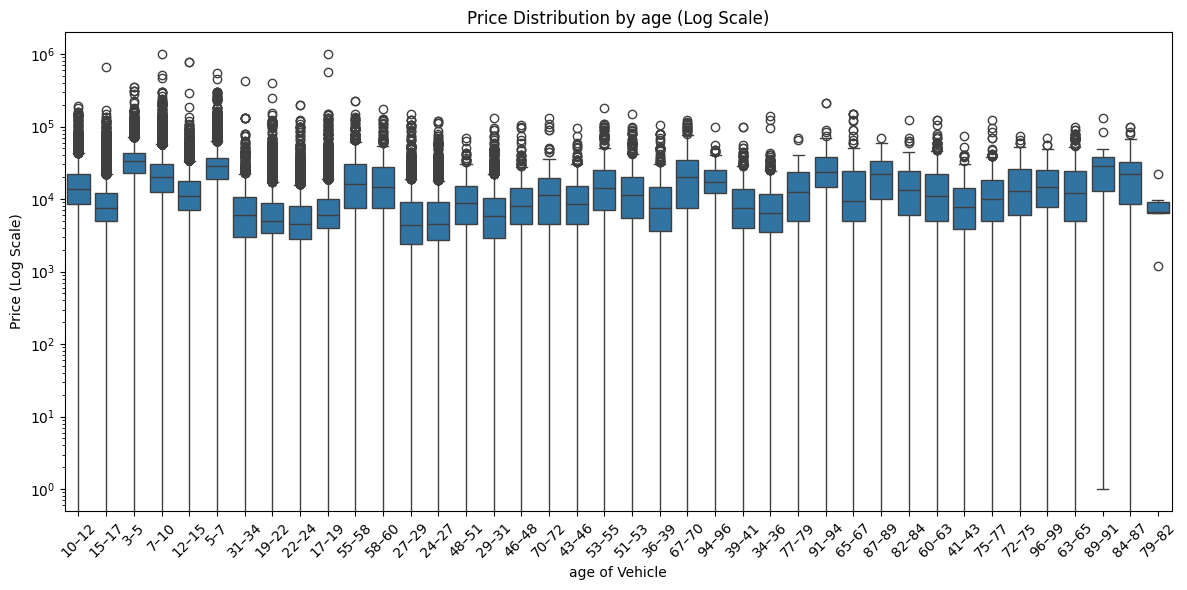

In [14]:
# results: there ae a lot of price outliers for a used car based on age.
# lets drop card over 100 years of age
df = df[df['age'] < 100]

#lets drop prices over a million dollars and recheck
df = df[df['price'] < 1000000.0]

bin_plot(df, 'age', 40)


/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/969632484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col] = kbins.fit_transform(df[[col]]).astype(int)
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/969632484.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col+"_label"] = df[bin_col].map(dict(enumerate(bin_labels)))


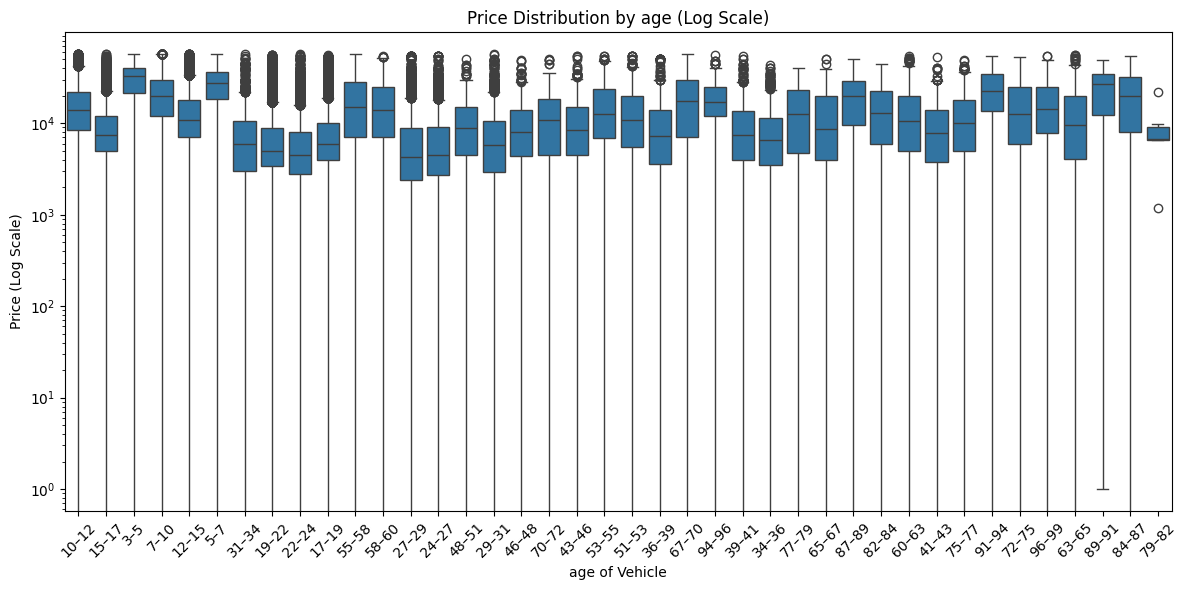

In [15]:
# we still get a lot of outliers
# lets remove price outliers in general using IQR
from scipy.stats import iqr

# Step 1: Compute IQR using scipy
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
price_iqr = iqr(df['price'], nan_policy='omit')  # This is Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * price_iqr
upper_bound = Q3 + 1.5 * price_iqr

# Step 3: Filter the DataFrame
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


bin_plot(df, 'age', 40)

/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/969632484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col] = kbins.fit_transform(df[[col]]).astype(int)
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/969632484.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col+"_label"] = df[bin_col].map(dict(enumerate(bin_labels)))


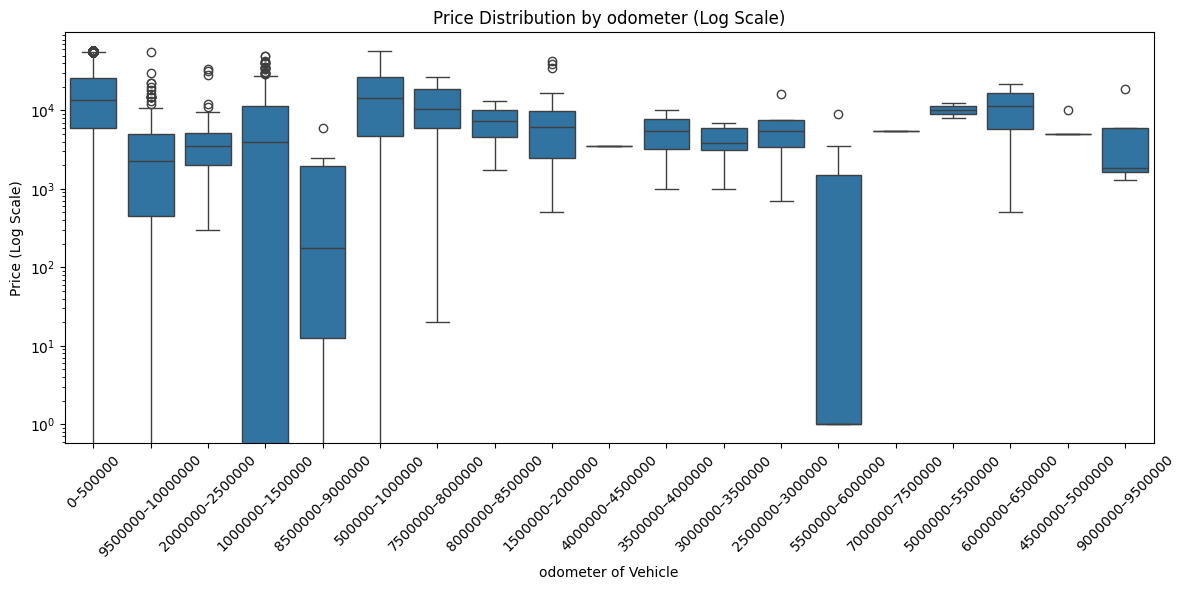

drop odometer readings eq and over 2M


/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/969632484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col] = kbins.fit_transform(df[[col]]).astype(int)
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/969632484.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col+"_label"] = df[bin_col].map(dict(enumerate(bin_labels)))


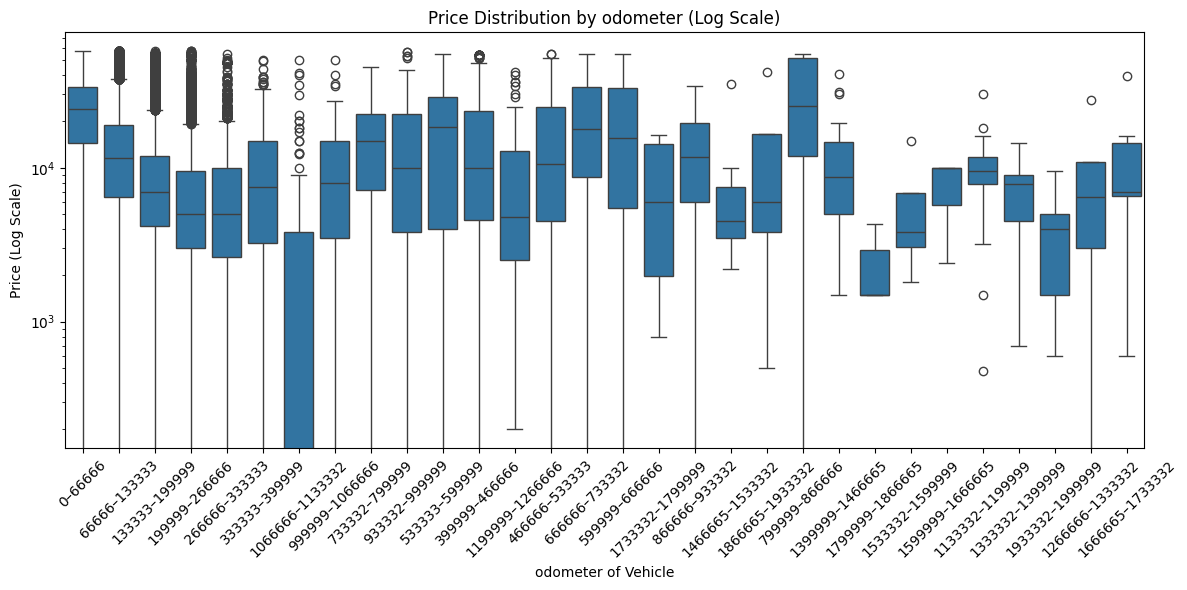

In [16]:
# bin the odometers and see how it plots

bin_plot(df, "odometer", 20)
#lets drop rows with over 20M miles
df = df[df['odometer'] < 2000000]

print("drop odometer readings eq and over 2M")
#recheck
bin_plot(df, "odometer", 30)


<class 'pandas.core.frame.DataFrame'>
Index: 413088 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 413088 non-null  object 
 1   price                  413088 non-null  int64  
 2   manufacturer           397532 non-null  object 
 3   condition              247790 non-null  object 
 4   fuel                   410949 non-null  object 
 5   odometer               413088 non-null  float64
 6   transmission           411459 non-null  object 
 7   drive                  286278 non-null  object 
 8   type                   413088 non-null  object 
 9   paint_color            287584 non-null  object 
 10  state                  413088 non-null  object 
 11  cylinders              413088 non-null  float64
 12  age                    413088 non-null  float64
 13  age_binned             413088 non-null  int64  
 14  age_binned_label       413088 non-null  

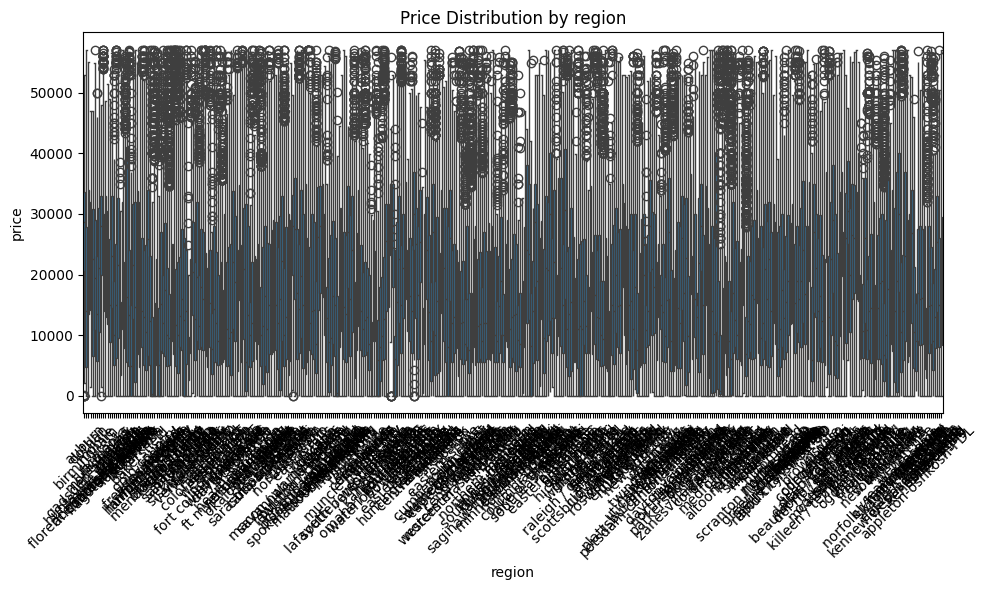


Mean and Median Price by manufacturer:
                  mean   median  count
manufacturer                          
tesla         34892.95  36999.0    777
alfa-romeo    28123.41  29590.0    891
jaguar        26200.39  28590.0   1927
ram           24871.79  25995.0  17355
porsche       24844.24  25000.0   1235
rover         23712.13  23590.0   1961
audi          22089.71  22590.0   7298
aston-martin  21870.21  17423.5     14
gmc           20721.64  19500.0  15766
acura         19768.97  18500.0   5921


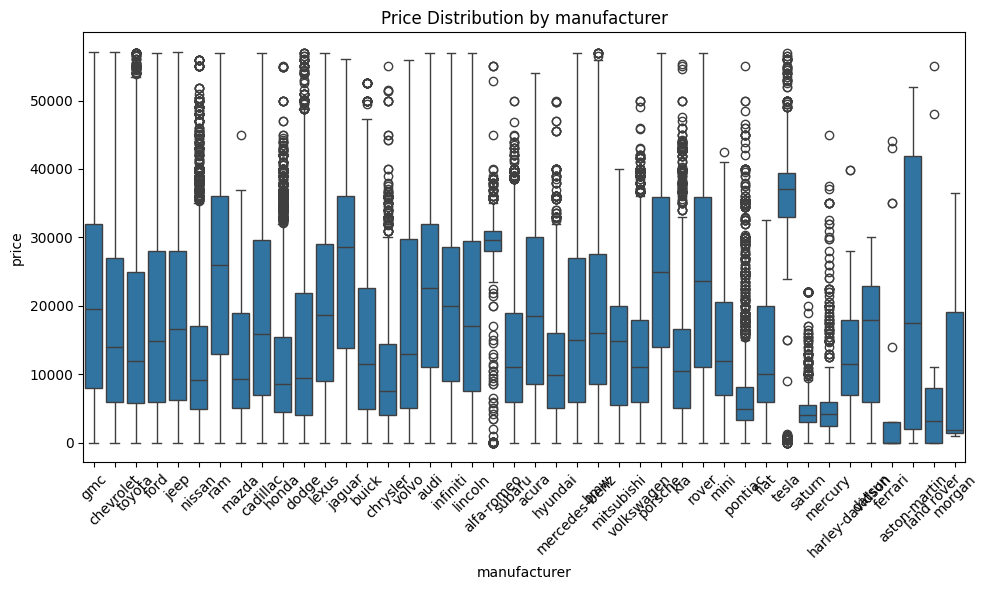


Mean and Median Price by condition:
               mean   median   count
condition                           
good       20326.43  19990.0  120448
new        16670.02  12000.0    1162
like new   16432.33  13495.0   20503
excellent  13628.58  10950.0   98377
fair        3921.91   2800.0    6709
salvage     3655.08   1850.0     591


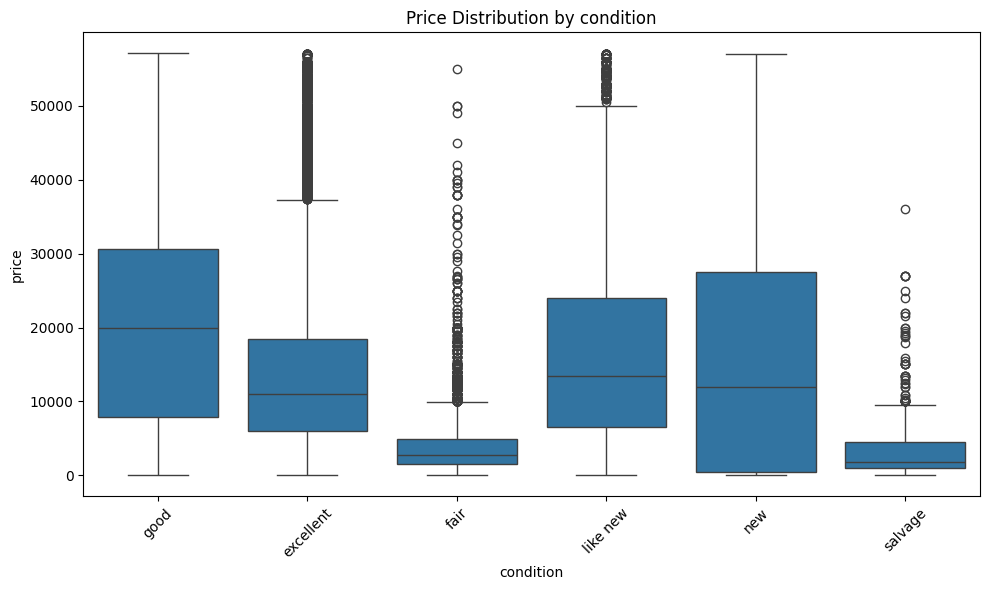


Mean and Median Price by fuel:
              mean   median   count
fuel                               
other     24090.14  25590.0   29638
diesel    24053.03  23996.0   26372
electric  22708.88  20952.0    1619
gas       15151.69  11995.0  348205
hybrid    14282.17  11995.0    5115


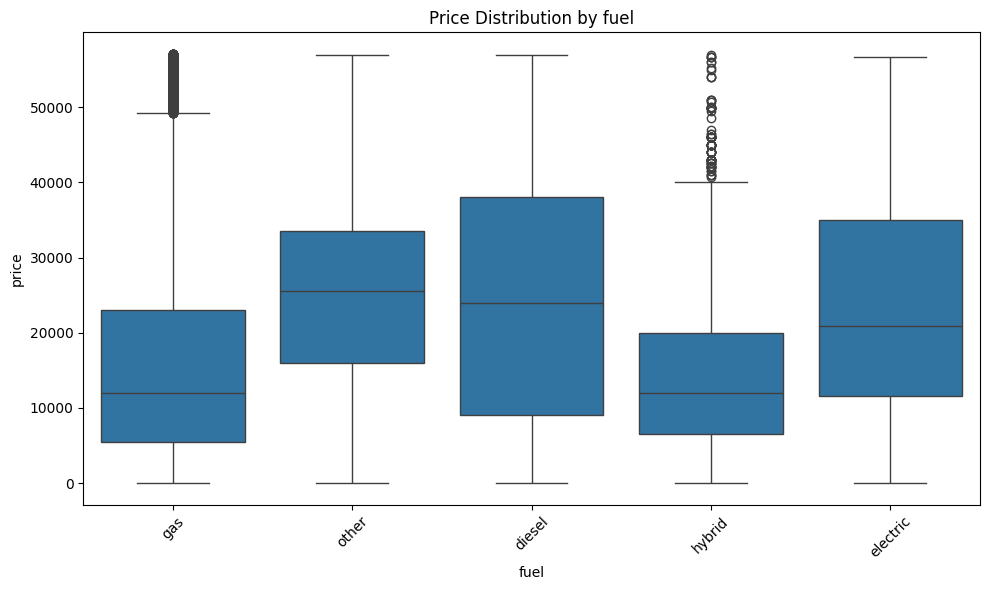


Mean and Median Price by transmission:
                  mean   median   count
transmission                           
other         27314.86  27990.0   62330
automatic     14564.63  10995.0  324800
manual        12843.74   8995.0   24329


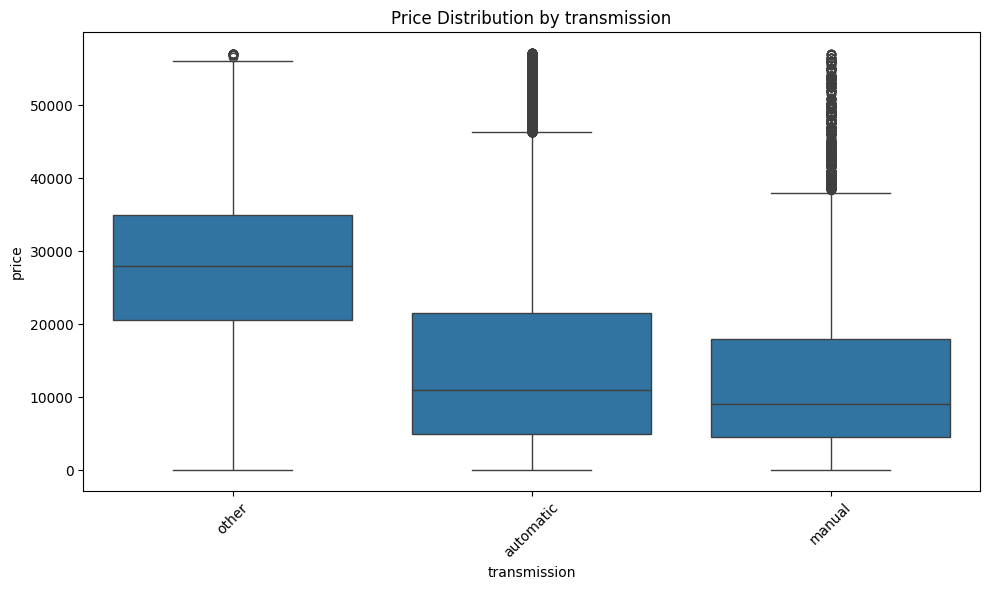


Mean and Median Price by drive:
           mean   median   count
drive                           
4wd    19583.76  17350.0  125608
rwd    18626.03  16995.0   56998
fwd    11503.38   9497.5  103672


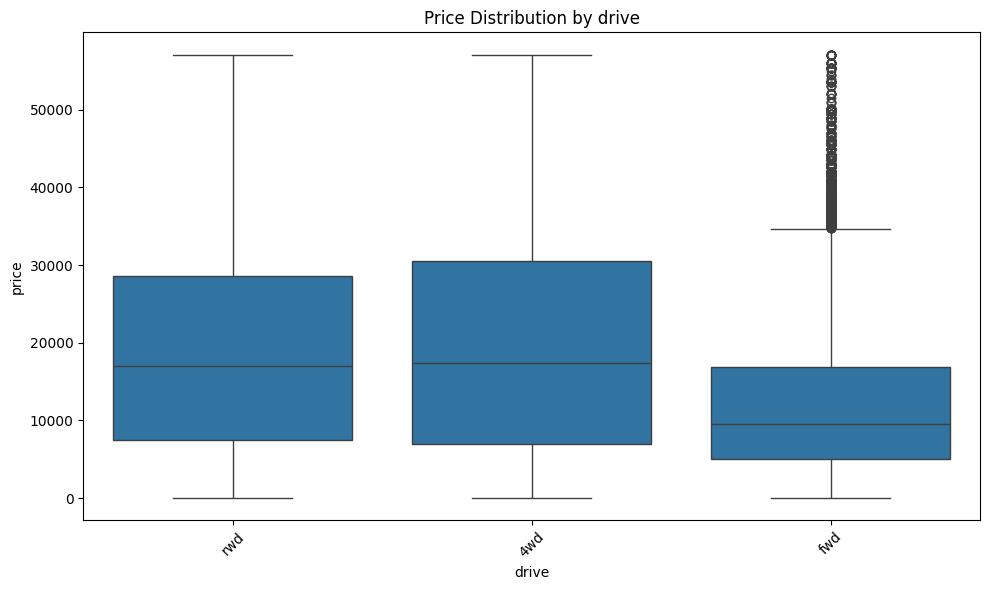


Mean and Median Price by type:
            mean   median   count
type                             
pickup  25625.93  26995.0   41128
truck   20775.52  19850.0   33234
SUV     15507.74  12999.0   75350
other   15499.84  12000.0  177882
sedan   12909.47   9995.0   85494


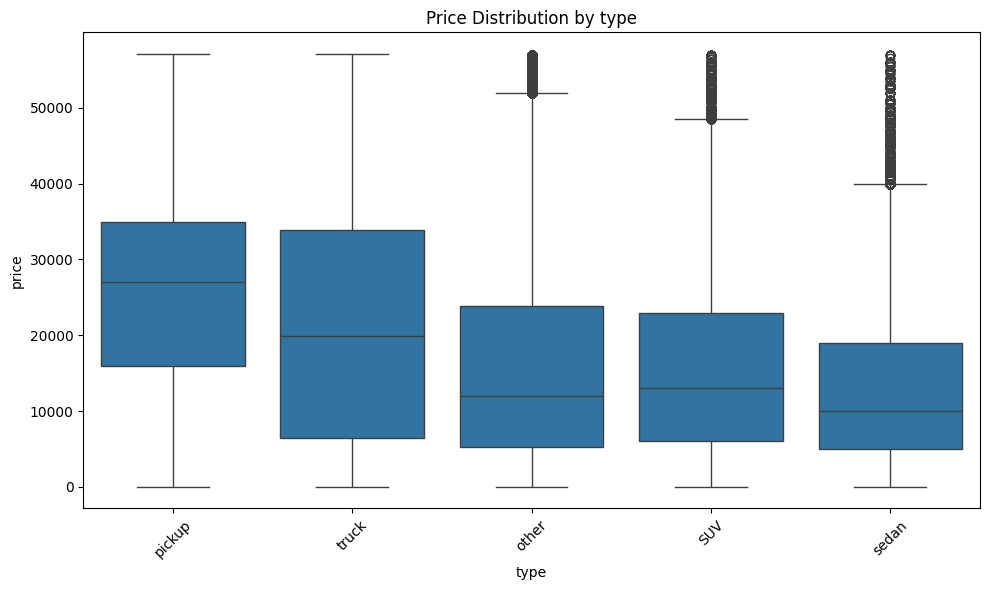


Mean and Median Price by paint_color:
                 mean   median  count
paint_color                          
white        19367.17  17990.0  76210
black        19079.25  16990.0  60446
red          17459.67  14995.0  29593
orange       17167.92  16950.0   1939
yellow       16528.41  13500.0   2067
blue         15508.42  12500.0  30532
silver       15186.65  11995.0  42091
brown        14712.45  10995.0   6498
custom       14636.02  11760.0   6599
grey         13658.62  10500.0  23728


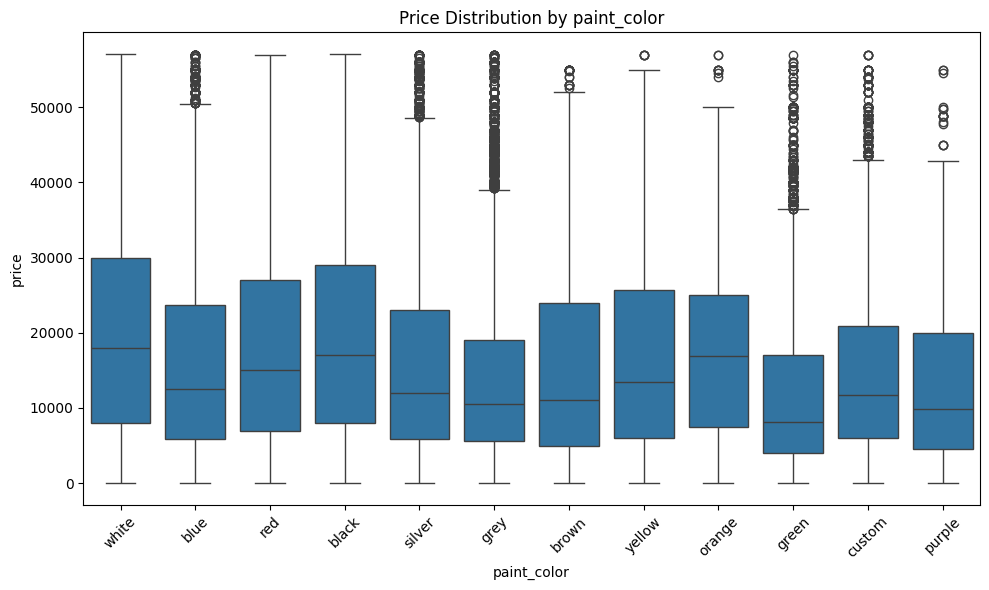


Mean and Median Price by state:
           mean   median  count
state                          
wv     23082.66  23995.0   1031
ak     22559.26  21988.0   3376
mt     21616.13  20500.0   5989
ut     20641.84  17495.0   1055
mo     19966.76  17988.0   4182
wy     19954.42  17999.0    595
al     19372.42  18640.5   4804
wa     18823.36  14999.0  12533
ky     18799.02  16900.0   4120
tn     18657.54  17000.0  10899


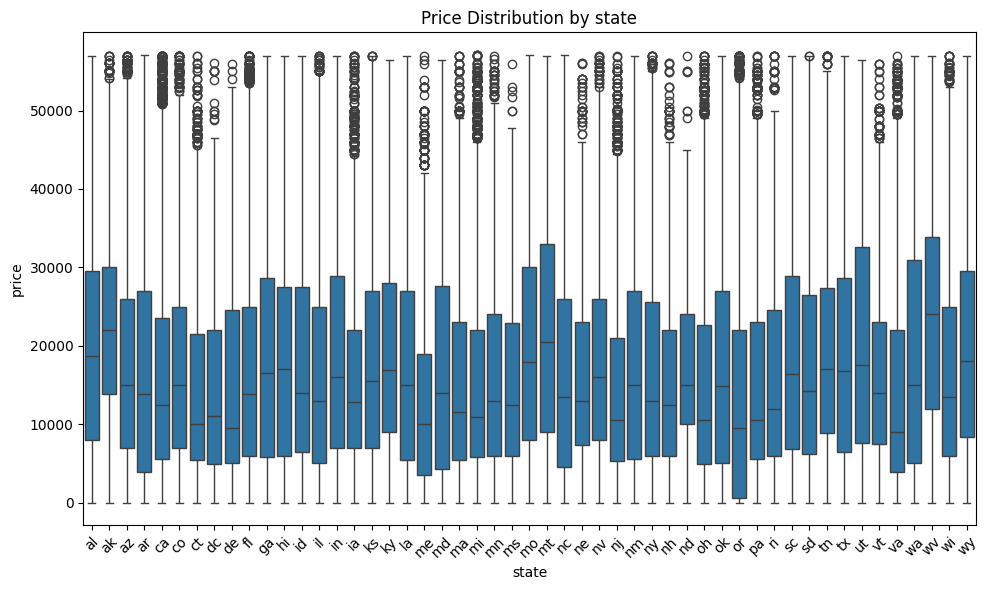

In [17]:
#lets try the categorical values
print(df.info())

categorical_cols = ['region', 'manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type',
       'paint_color', 'state']

for col in categorical_cols:
    print(f"\nMean and Median Price by {col}:")
    group_stats = df.groupby(col)['price'].agg(['mean', 'median', 'count']).round(2).sort_values('mean', ascending=False)

    print(group_stats.head(10))
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:

print(df.columns)

#fill categorical nans as unknowns
print("Condition unique values:"+str(df['condition'].unique())+", count of missing rows:"+str(len(df['condition'].isna())))
#replace nan with "unknown"
df['condition'] = df['condition'].fillna('unknown')

#Colors
print("Colors unique values: "+ str(df['paint_color'].unique()))
df['paint_color'] = df['paint_color'].fillna('unknown')

#fuel
print("fuel unique values: "+ str(df['fuel'].unique()))
df['fuel'] = df['fuel'].fillna('unknown')

#transmission, drop nans
print("transmission unique values: "+ str(df['transmission'].unique()))
df = df.dropna(subset=['transmission'])

#region
print("region unique values: "+ str(len(df['region'].unique())) + ", nan count:"+ str(df['region'].isna().sum()))
df['region'] = df['region'].fillna('unknown')

#~4% manufacturer is nan and we cant impute that information. Drop those rows
print("manufacturer unique values: "+ str(len(df['manufacturer'].unique())) + ", nan count:"+ str(df['manufacturer'].isna().sum()))
df = df.dropna(subset=['manufacturer'])


Index(['region', 'price', 'manufacturer', 'condition', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'state', 'cylinders',
       'age', 'age_binned', 'age_binned_label', 'odometer_binned',
       'odometer_binned_label'],
      dtype='object')
Condition unique values:['good' 'excellent' 'fair' nan 'like new' 'new' 'salvage'], count of missing rows:413088
Colors unique values: ['white' 'blue' 'red' 'black' 'silver' 'grey' nan 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
fuel unique values: ['gas' 'other' 'diesel' 'hybrid' nan 'electric']
transmission unique values: ['other' 'automatic' 'manual' nan]


/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/1779999589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df['condition'].fillna('unknown')
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/1779999589.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paint_color'] = df['paint_color'].fillna('unknown')
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_6644/1779999589.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

region unique values: 404, nan count:0
manufacturer unique values: 43, nan count:15486


<class 'pandas.core.frame.DataFrame'>
Index: 395973 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 395973 non-null  object 
 1   price                  395973 non-null  int64  
 2   manufacturer           395973 non-null  object 
 3   condition              395973 non-null  object 
 4   fuel                   395973 non-null  object 
 5   odometer               395973 non-null  float64
 6   transmission           395973 non-null  object 
 7   drive                  276579 non-null  object 
 8   type                   395973 non-null  object 
 9   paint_color            395973 non-null  object 
 10  state                  395973 non-null  object 
 11  cylinders              395973 non-null  float64
 12  age                    395973 non-null  float64
 13  age_binned             395973 non-null  int64  
 14  age_binned_label       395973 non-null  

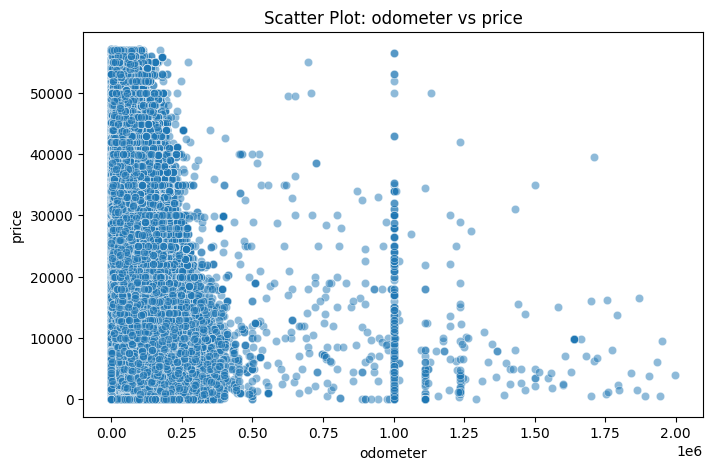

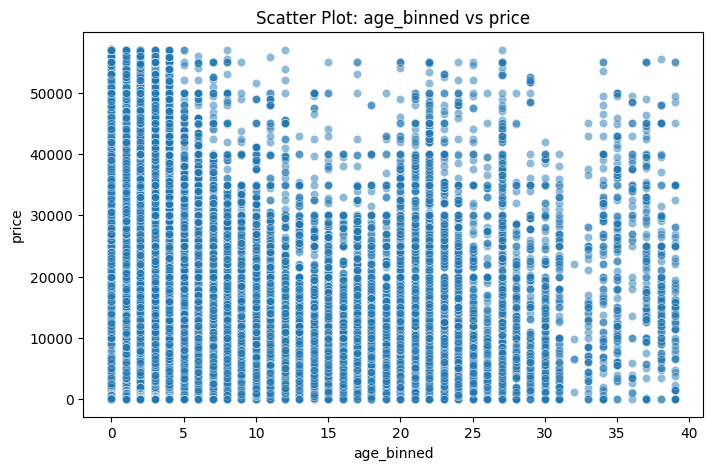

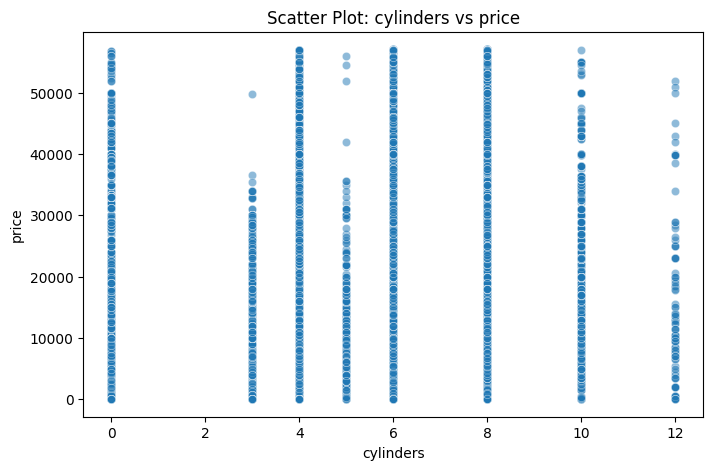

In [19]:
# lets do some uni and multivariate analysis and as part of it, lets see how outliers affect price
df.info()
import seaborn as sns
import matplotlib.pyplot as plt


target_col = 'price'
numerical_cols = ['odometer', 'age_binned', 'cylinders']
categorical_cols = ['region', 'manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'state']
# Ensure all columns (except price) are in either numerical_cols or categorical_cols
feature_cols = numerical_cols + categorical_cols

print("--- Numerical Feature Correlations with Price ---")
# Ensure 'price' is also numeric
numeric_data_for_corr = df[numerical_cols + [target_col]]
correlation_matrix = numeric_data_for_corr.corr()
print(correlation_matrix[target_col].sort_values(ascending=False))

# Visualize with scatter plots
print("\n--- Scatter Plots (Numerical vs. Price) ---")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=target_col, alpha=0.5) # Use alpha for large datasets
    plt.title(f'Scatter Plot: {col} vs {target_col}')
    plt.show()

#remove outliers with IQR for numerical columns: year, price, odometer (cylinders - what would be outliers here?)





# there are multiple columns that are non-numeric and could be relevant, # region, manufacturer, model, condition, lets ohe them

#check corr


Mean and Median Price by region:
                       mean   median  count
region                                     
southwest TX       29668.57  29995.0     28
owensboro          29429.66  29990.0    133
galveston          29077.33  30990.0    210
olympic peninsula  28973.68  29999.0    631
boone              28911.68  30990.0    317
northwest KS       28811.23  28990.0    136
san angelo         28746.52  28819.0    152
logan              28590.08  31999.0    132
northwest OK       27745.00  27990.0    138
laredo             27714.19  28995.0    308


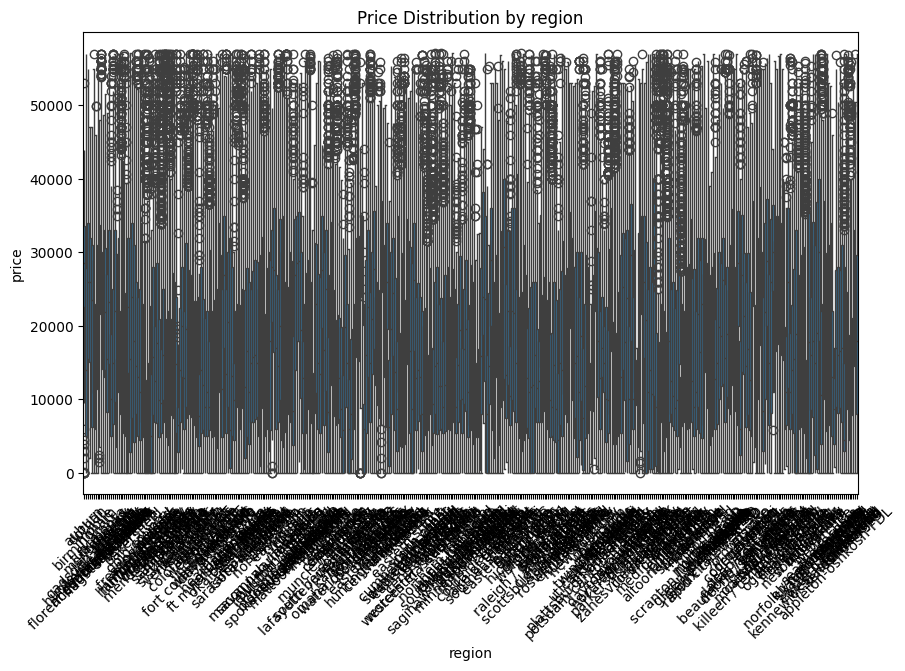


Mean and Median Price by manufacturer:
                  mean   median  count
manufacturer                          
tesla         34900.55  36999.0    776
alfa-romeo    28123.41  29590.0    891
jaguar        26217.75  28590.0   1925
ram           24849.79  25995.0  17293
porsche       24787.96  25000.0   1219
rover         23727.65  23850.0   1957
audi          22092.19  22590.0   7269
aston-martin  21870.21  17423.5     14
gmc           20715.84  19500.0  15721
acura         19772.71  18500.0   5913


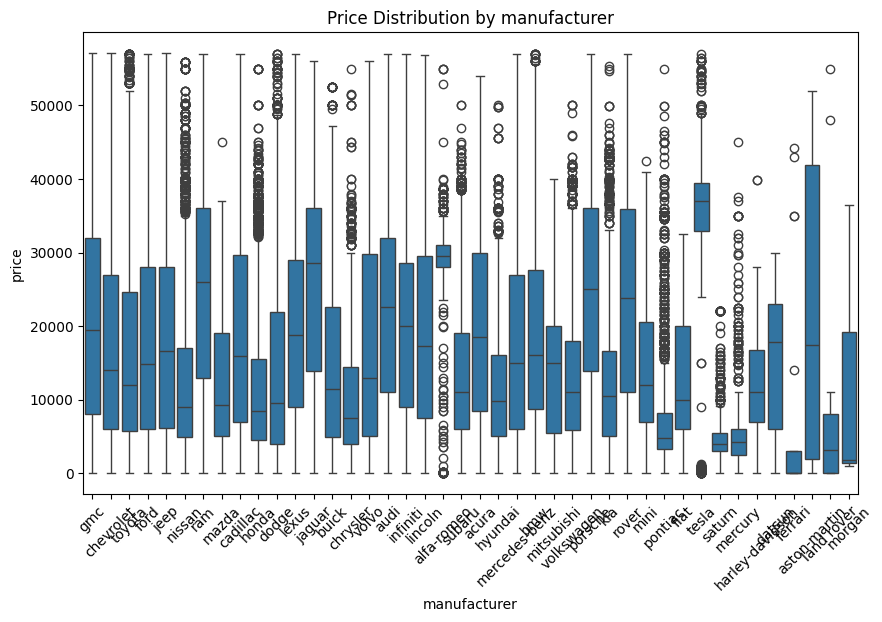


Mean and Median Price by condition:
               mean   median   count
condition                           
good       20479.44  20590.0  115335
new        17153.14  13940.0    1044
like new   16440.62  13495.0   19606
unknown    15833.07  12930.5  158548
excellent  13554.74  10950.0   94771
fair        3771.38   2797.0    6126
salvage     3726.06   1900.0     543


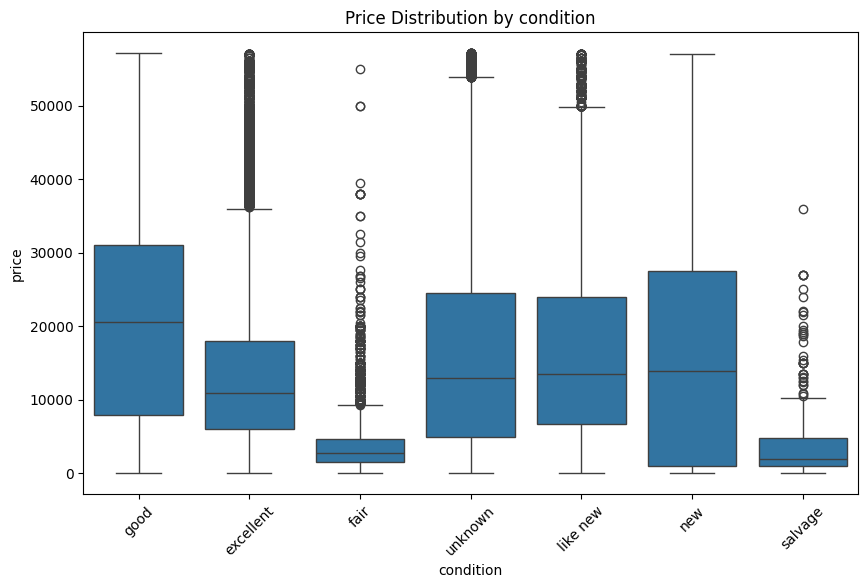


Mean and Median Price by fuel:
              mean   median   count
fuel                               
diesel    24433.97  24888.0   22876
other     24319.11  25590.0   28344
electric  23563.71  22995.0    1524
unknown   18982.39  16997.0    1920
gas       15254.48  11999.0  336260
hybrid    14296.76  11995.0    5049


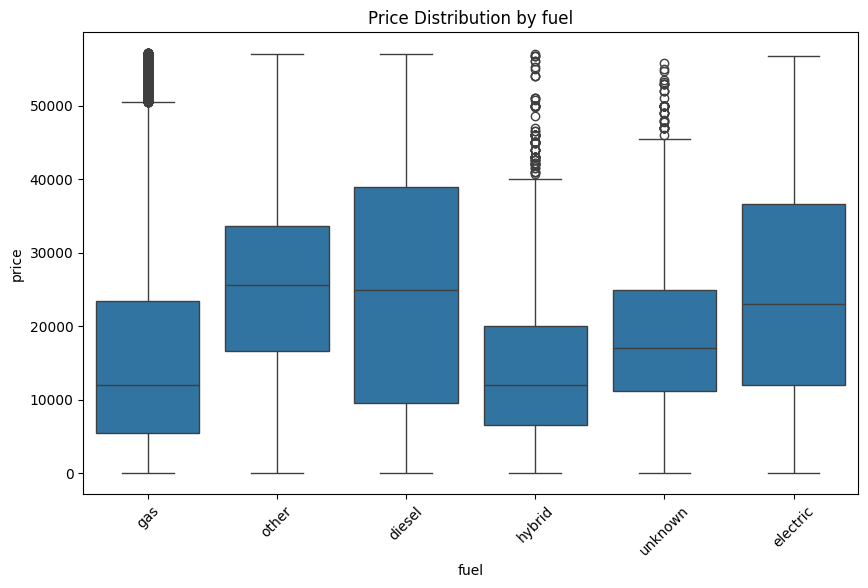


Mean and Median Price by transmission:
                  mean   median   count
transmission                           
other         27678.21  28590.0   59962
automatic     14591.86  10995.0  314340
manual        12727.57   8995.0   21671


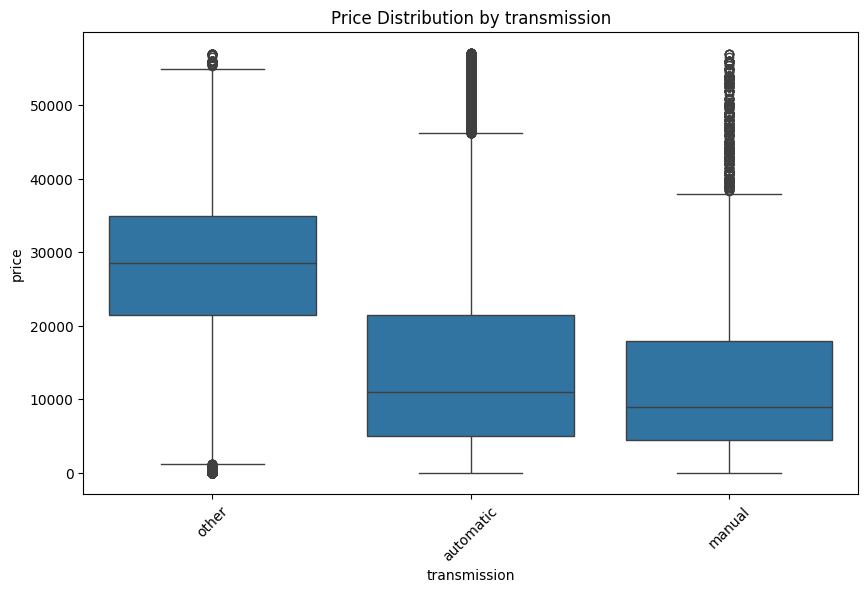


Mean and Median Price by drive:
           mean   median   count
drive                           
4wd    19630.21  17500.0  123437
rwd    18463.73  16988.0   52731
fwd    11564.73   9500.0  100411


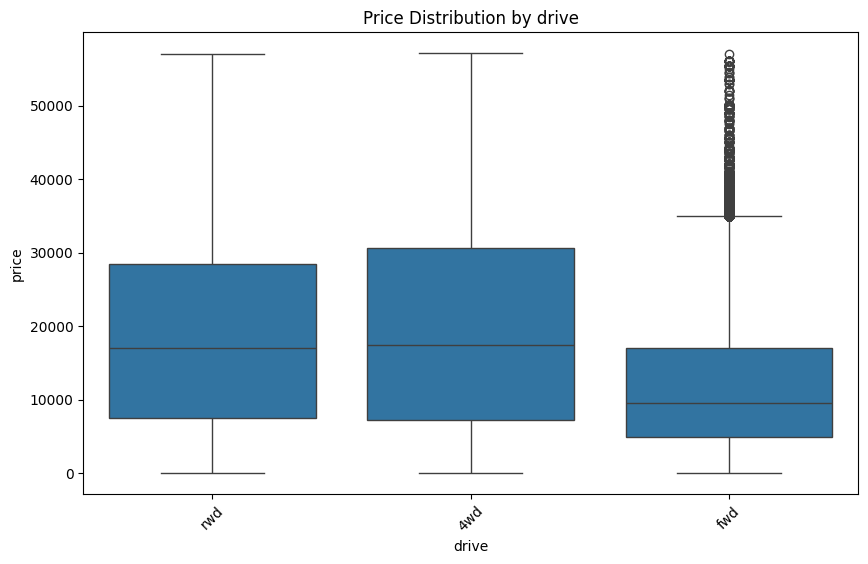


Mean and Median Price by type:
            mean   median   count
type                             
pickup  25682.11  26999.0   40632
truck   20656.74  19500.0   31588
other   15675.45  12500.0  166701
SUV     15547.84  12999.0   73977
sedan   12795.03   9995.0   83075


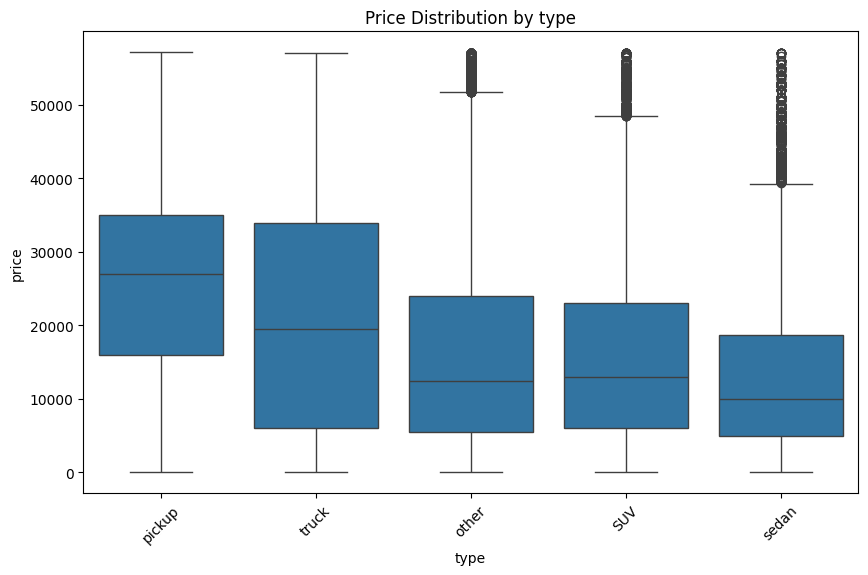


Mean and Median Price by paint_color:
                 mean   median   count
paint_color                           
white        19315.54  17990.0   72640
black        19168.35  16991.0   58908
red          17417.80  14999.0   28042
orange       17310.80  16990.0    1783
yellow       16963.95  14900.0    1741
blue         15589.68  12500.0   29375
silver       15274.59  11999.0   41011
brown        14796.41  10995.0    6306
unknown      14768.17  10950.0  119452
custom       14723.76  11900.0    6280


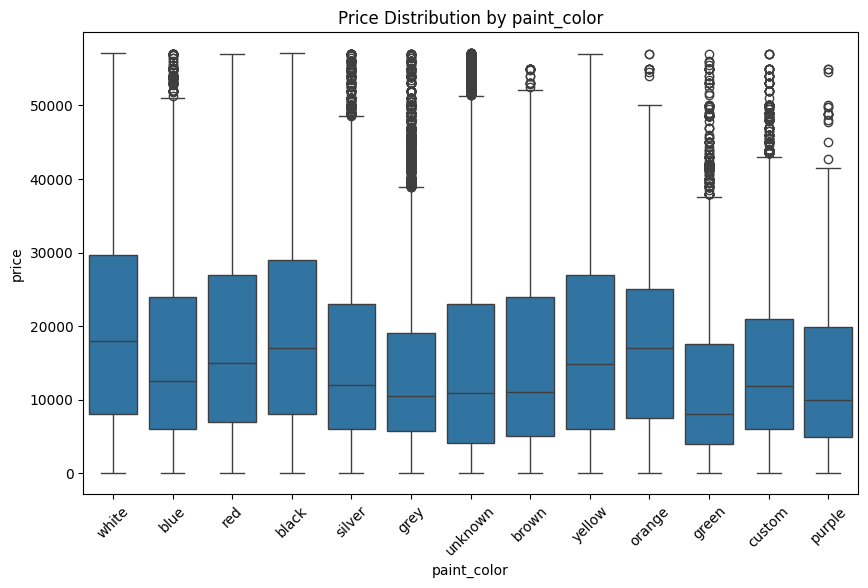


Mean and Median Price by state:
           mean   median  count
state                          
wv     23289.99  24990.0    974
ak     22707.88  21995.0   3276
mt     21554.72  20868.5   5716
ut     20573.40  16997.0    994
mo     20085.83  17990.0   4063
wy     19794.13  17995.0    557
al     19569.58  18977.5   4570
wa     18982.70  14999.0  12219
ky     18944.81  16925.0   3944
tn     18769.76  17500.0  10498


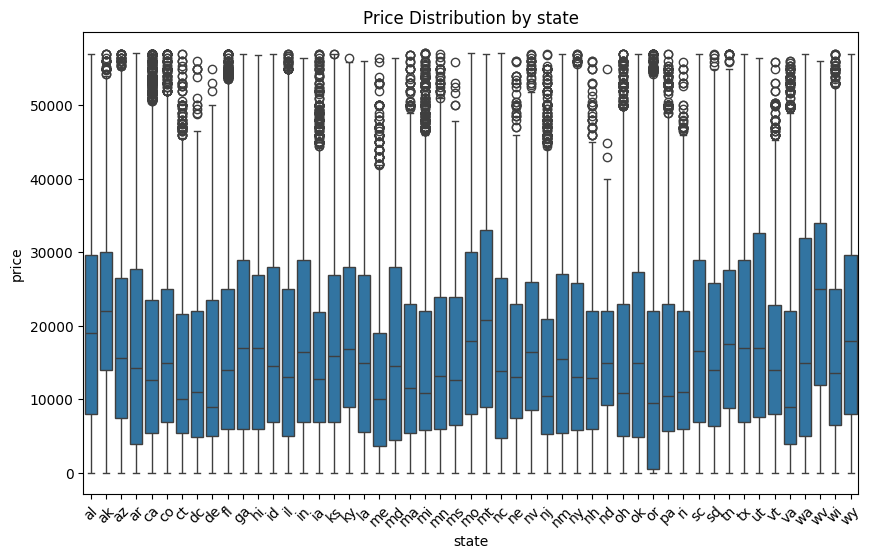

In [20]:
#lets try the categorical values
type(df)
for col in categorical_cols:
    print(f"\nMean and Median Price by {col}:")
    group_stats = df.groupby(col)['price'].agg(['mean', 'median', 'count']).round(2).sort_values('mean', ascending=False)

    print(group_stats.head(10))
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [21]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395973 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 395973 non-null  object 
 1   price                  395973 non-null  int64  
 2   manufacturer           395973 non-null  object 
 3   condition              395973 non-null  object 
 4   fuel                   395973 non-null  object 
 5   odometer               395973 non-null  float64
 6   transmission           395973 non-null  object 
 7   drive                  276579 non-null  object 
 8   type                   395973 non-null  object 
 9   paint_color            395973 non-null  object 
 10  state                  395973 non-null  object 
 11  cylinders              395973 non-null  float64
 12  age                    395973 non-null  float64
 13  age_binned             395973 non-null  int64  
 14  age_binned_label       395973 non-null  

In [22]:
# we need to get a smaller set of categorical columns to encode so we can find key columns to encode moving forward
# its not covered, but ANOVA is a potential candidate. Lets try it out
from scipy.stats import f_oneway

anova_results = {}
for col in categorical_cols:
    groups = [group['price'].dropna() for name, group in df.groupby(col)]
    if len(groups) > 1:
        try:
            stat, p = f_oneway(*groups)
            anova_results[col] = {'F-stat': stat, 'p-value': p}
        except:
            continue


# we want F-statistic is high and  p-value < 0.05 (statistically significant)
sorted_results = sorted(anova_results.items(), key=lambda x: x[1]['F-stat'], reverse=True)
print(sorted_results)
# we see:
# [('transmission', {'F-stat': np.float64(30390.384452678554), 'p-value': np.float64(0.0)}), ('drive', {'F-stat': np.float64(12534.84070040593), 'p-value': np.float64(0.0)}), ('fuel', {'F-stat': np.float64(4649.987471480927), 'p-value': np.float64(0.0)}), ('condition', {'F-stat': np.float64(3846.0341872705853), 'p-value': np.float64(0.0)}), ('type', {'F-stat': np.float64(3718.3776762579396), 'p-value': np.float64(0.0)}), ('manufacturer', {'F-stat': np.float64(909.8564490489679), 'p-value': np.float64(0.0)}), ('paint_color', {'F-stat': np.float64(881.9225668697815), 'p-value': np.float64(0.0)}), ('title_status', {'F-stat': np.float64(520.314736533978), 'p-value': np.float64(0.0)}), ('state', {'F-stat': np.float64(161.919664147478), 'p-value': np.float64(0.0)}), ('region', {'F-stat': np.float64(65.47836964038322), 'p-value': np.float64(0.0)})]
#lets pick transmission, drive,


"""num_features = ['odometer', 'num_cylinders', 'vehicle_title_status',
       'vehicle_condition', 'vehicle_drive', 'vehicle_type',
       'log_vehicle_age', 'vehicle_age_odometer_ratio', 'title_good_condition', 'vehicle_age_condition', 'vehicle_age',
       'transmission_automatic', 'transmission_manual', 'transmission_other',
       'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'region_encoded', 'manufacturer_encoded',
       'model_encoded', 'paint_color_encoded', 'state_encoded']"""

[('transmission', {'F-stat': np.float64(30126.806003905767), 'p-value': np.float64(0.0)}), ('drive', {'F-stat': np.float64(12366.270364885637), 'p-value': np.float64(0.0)}), ('type', {'F-stat': np.float64(8390.24244158302), 'p-value': np.float64(0.0)}), ('fuel', {'F-stat': np.float64(4716.014592608373), 'p-value': np.float64(0.0)}), ('condition', {'F-stat': np.float64(3923.1738221999344), 'p-value': np.float64(0.0)}), ('paint_color', {'F-stat': np.float64(907.6917505937663), 'p-value': np.float64(0.0)}), ('manufacturer', {'F-stat': np.float64(907.5681364783986), 'p-value': np.float64(0.0)}), ('state', {'F-stat': np.float64(162.510550421244), 'p-value': np.float64(0.0)}), ('region', {'F-stat': np.float64(64.91834923931444), 'p-value': np.float64(0.0)})]


"num_features = ['odometer', 'num_cylinders', 'vehicle_title_status',\n       'vehicle_condition', 'vehicle_drive', 'vehicle_type',\n       'log_vehicle_age', 'vehicle_age_odometer_ratio', 'title_good_condition', 'vehicle_age_condition', 'vehicle_age',\n       'transmission_automatic', 'transmission_manual', 'transmission_other',\n       'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',\n       'region_encoded', 'manufacturer_encoded',\n       'model_encoded', 'paint_color_encoded', 'state_encoded']"

In [23]:
# lets do this plan
# pick 5

df.columns
df.head(10)



,region,price,manufacturer,condition,fuel,odometer,transmission,drive,type,paint_color,state,cylinders,age,age_binned,age_binned_label,odometer_binned,odometer_binned_label
27,auburn,33590,gmc,good,gas,57923.0,other,NaN,pickup,white,al,8.0,11.0,3,10–12,0,0–66666
28,auburn,22590,chevrolet,good,gas,71229.0,other,NaN,pickup,blue,al,8.0,15.0,5,15–17,1,66666–133333
29,auburn,39590,chevrolet,good,gas,19160.0,other,NaN,pickup,red,al,8.0,5.0,0,3–5,0,0–66666
30,auburn,30990,toyota,good,gas,41124.0,other,NaN,pickup,red,al,8.0,8.0,2,7–10,0,0–66666
31,auburn,15000,ford,excellent,gas,128000.0,automatic,rwd,truck,black,al,6.0,12.0,3,10–12,1,66666–133333
32,auburn,27990,gmc,good,gas,68696.0,other,4wd,pickup,black,al,8.0,13.0,4,12–15,1,66666–133333
33,auburn,34590,chevrolet,good,gas,29499.0,other,4wd,pickup,silver,al,6.0,9.0,2,7–10,0,0–66666
34,auburn,35000,toyota,excellent,gas,43000.0,automatic,4wd,truck,grey,al,6.0,6.0,1,5–7,0,0–66666
35,auburn,29990,chevrolet,good,gas,17302.0,other,4wd,pickup,red,al,6.0,9.0,2,7–10,0,0–66666
36,auburn,38590,chevrolet,good,gas,30237.0,other,rwd,other,red,al,8.0,14.0,4,12–15,0,0–66666


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [24]:
#Univariate Regression per Feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

features = ['region', 'manufacturer', 'condition', 'fuel', 'type', 'age', 'age_binned', 'odometer_binned']
target = 'price'
results = []

for feature in features:
    df_temp = df[[feature, target]].dropna()

    # Encoding logic
    if feature == 'age':
        X = df_temp[[feature]].values
    elif feature in ['age_binned', 'odometer_binned']:
        le = LabelEncoder()
        X = le.fit_transform(df_temp[feature].astype(str)).reshape(-1, 1)
    else:
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X = ohe.fit_transform(df_temp[[feature]])

    y = df_temp[target].values

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Feature': feature,
        'MSE': f"{mse:,.0f}",
        'RMSE': f"{rmse:,.2f}",
        'R² Score': round(r2, 4)
    })

# Display sorted results
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print(results_df)


           Feature          MSE       RMSE  R² Score
6       age_binned  132,818,837  11,524.71    0.2226
7  odometer_binned  151,387,535  12,303.96    0.1140
5              age  152,497,559  12,348.99    0.1075
1     manufacturer  156,114,992  12,494.60    0.0863
4             type  157,570,111  12,552.69    0.0778
0           region  160,092,739  12,652.78    0.0630
3             fuel  161,102,195  12,692.60    0.0571
2        condition  161,114,620  12,693.09    0.0570


Explained Variance Ratio (first 20 components): [0.00530754 0.00479206 0.0040309  0.0037779  0.003506   0.00319744
 0.0031208  0.00292615 0.00274765 0.00264425 0.00259973 0.00255862
 0.002524   0.00251383 0.00243942 0.00240503 0.00238729 0.002372
 0.00235617 0.00233994]
Cumulative Variance (first 20 components): [0.00530754 0.0100996  0.01413049 0.0179084  0.0214144  0.02461184
 0.02773264 0.03065879 0.03340645 0.0360507  0.03865043 0.04120906
 0.04373306 0.04624689 0.04868631 0.05109134 0.05347863 0.05585062
 0.05820679 0.06054673]


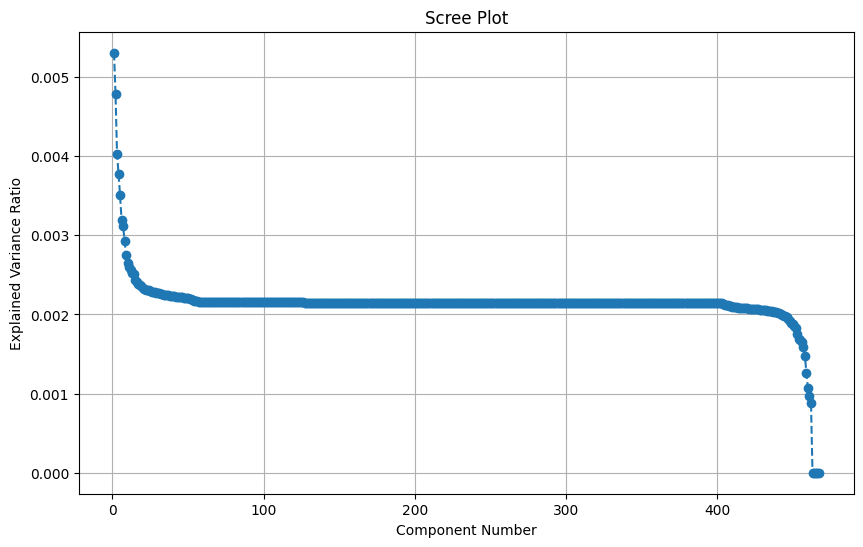

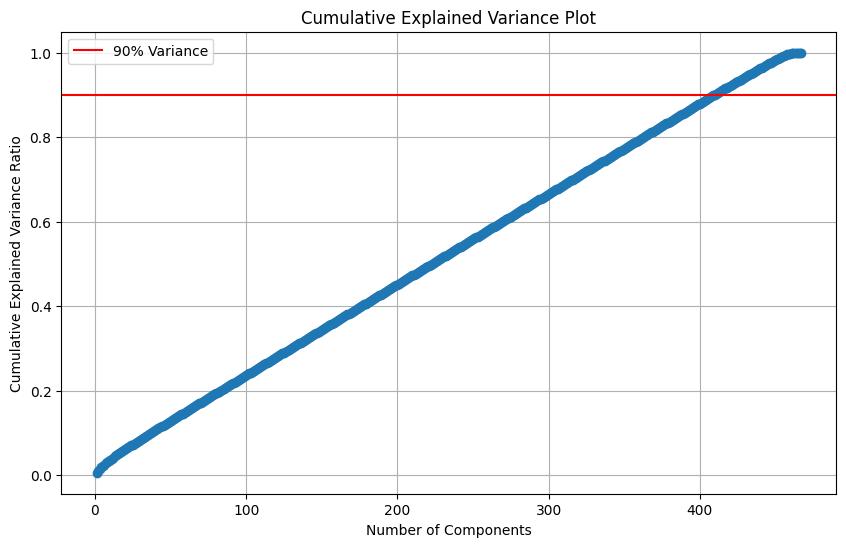

In [25]:
#Multi variate analysis + PCA to identify how many components we need to use

from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Selected features
features = ['region', 'manufacturer', 'condition', 'fuel', 'type', 'age', 'age_binned', 'odometer_binned']
target = 'price'

# Drop rows with any missing values in these columns
df_mult = df[features + [target]].dropna().copy()

# Define feature types
onehot_features = ['region', 'manufacturer', 'condition', 'fuel', 'type']
label_features = ['age_binned', 'odometer_binned']
numeric_features = ['age']

# Label encode binned features
for col in label_features:
    le = LabelEncoder()
    df_mult[col] = le.fit_transform(df_mult[col].astype(str))

# Create column transformer
column_transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_features)
], remainder='passthrough')  # Pass through numeric and label-encoded columns

# Split data
X_full = df_mult.drop(columns=target)
y = df_mult[target]

# Apply column transformer
X_encoded = column_transformer.fit_transform(X_full)


results = []
max_components = min(X_encoded.shape[0], X_encoded.shape[1])  # safe upper bound

# Assume X_encoded (133403, 178)
pca = PCA(random_state=42)
#standardize
X_encoded = StandardScaler().fit_transform(X_encoded)
pca.fit(X_encoded)  # Fit PCA on all features

# Explained variance ratio and cumulative sum
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print variance for first 20 components
print("Explained Variance Ratio (first 20 components):", explained_variance_ratio[:20])
print("Cumulative Variance (first 20 components):", cumulative_variance[:20])

# get a scree plot to check this out
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Variance')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()


Modeling with 10 components
PCA reduced to 10 components, dataset shape: (395973, 10)
Explained variance ratio: 0.0361

Linear Regression:
R²: Mean=0.3300, Std=0.0433
RMSE: Mean=10676.12, Std=384.39

Lasso Regression:
R²: Mean=0.3300, Std=0.0433
RMSE: Mean=10676.12, Std=384.31

Ridge Regression:
R²: Mean=0.3300, Std=0.0433
RMSE: Mean=10676.11, Std=384.38

Modeling with 30 components
PCA reduced to 30 components, dataset shape: (395973, 30)
Explained variance ratio: 0.0835

Linear Regression:
R²: Mean=0.3571, Std=0.0371
RMSE: Mean=10459.13, Std=360.57

Lasso Regression:
R²: Mean=0.3572, Std=0.0371
RMSE: Mean=10459.09, Std=360.60

Ridge Regression:
R²: Mean=0.3571, Std=0.0371
RMSE: Mean=10459.13, Std=360.57

Modeling with 100 components
PCA reduced to 100 components, dataset shape: (395973, 100)
Explained variance ratio: 0.2361

Linear Regression:
R²: Mean=0.2902, Std=0.0707
RMSE: Mean=10979.86, Std=553.08

Lasso Regression:
R²: Mean=0.2940, Std=0.0699
RMSE: Mean=10950.75, Std=550.66

R

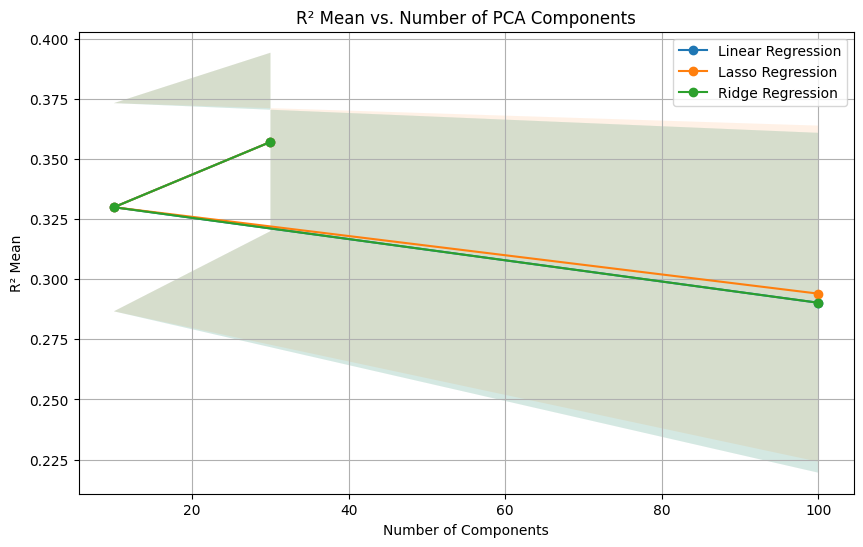

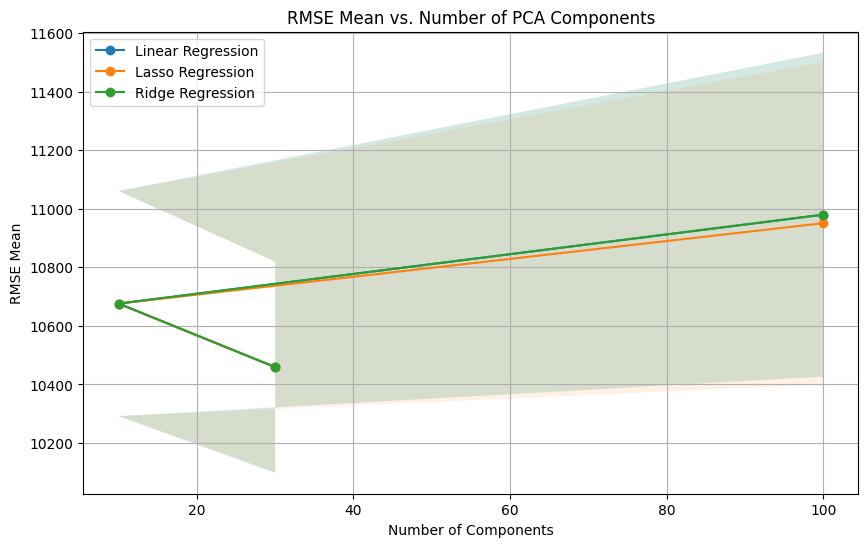

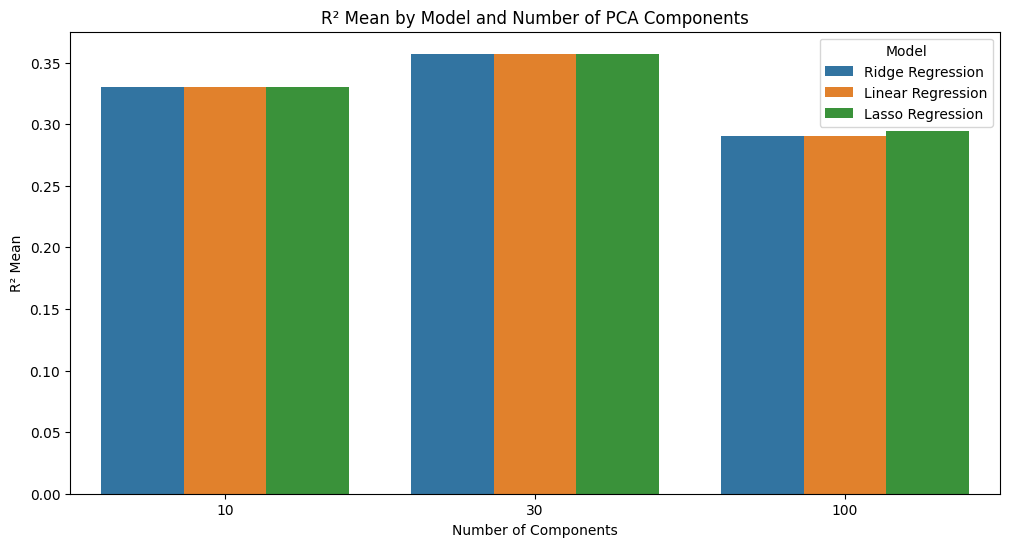


Fitting final model: Lasso Regression with 30 components
Final Lasso Regression model fitted on entire dataset with 30 components

Interpreting coefficients for Lasso Regression (n=30):
   PCA Component  Coefficient
0    Component 1 -4124.419837
1    Component 2  -311.470653
2    Component 3  1586.024543
3    Component 4 -1023.229596
4    Component 5 -1172.508343
5    Component 6 -1066.017817
6    Component 7 -1763.039064
7    Component 8   253.573659
8    Component 9   560.691928
9   Component 10   317.441116
10  Component 11  -369.362099
11  Component 12    -5.645283
12  Component 13   -16.720321
13  Component 14  -194.903917
14  Component 15 -1168.584746
15  Component 16   105.575403
16  Component 17  -249.067992
17  Component 18  -888.114818
18  Component 19  -442.995238
19  Component 20  -248.277184
20  Component 21  -433.358992
21  Component 22   552.020770
22  Component 23   247.219557
23  Component 24  -863.103772
24  Component 25  -381.053022
25  Component 26   209.630937
26 

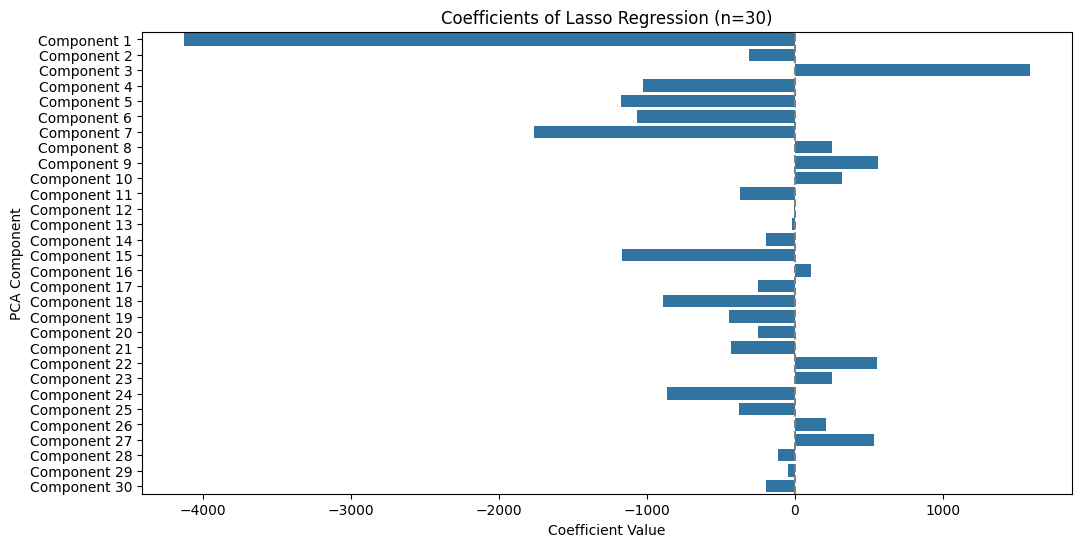

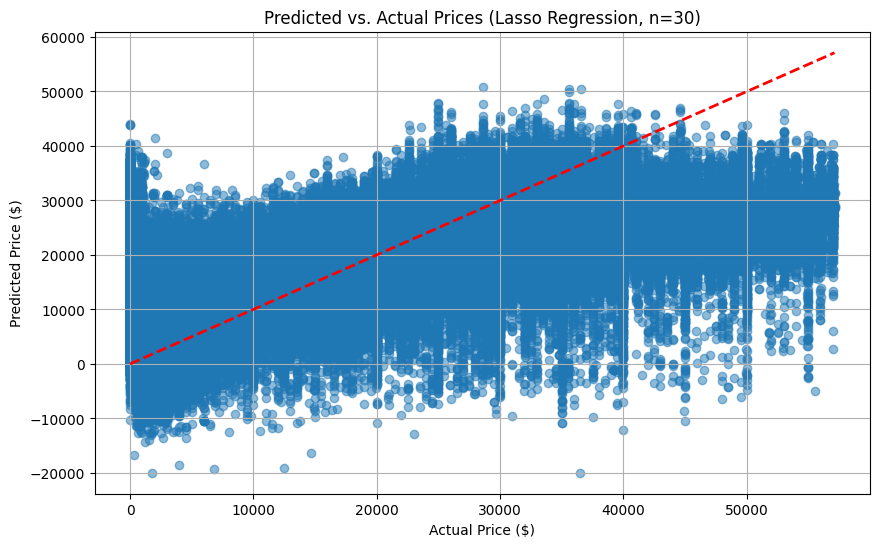


Interpretation of Predicted vs. Actual Plot:
- Points close to the red diagonal line (y=x) indicate accurate predictions.
- Points far from the line show prediction errors.
- A tight cluster along the line suggests good model performance; a wide spread indicates poor fit.


In [26]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# Test different numbers of components
test_components = [10, 30, 100]  # Elbow (10), initial choice (30), 80% (100)
k_folds = 5
results = []
run_count = 0

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42)
}

# Loop over number of components and evaluate each model
for n in test_components:
    print(f"\nModeling with {n} components")
    
    # Apply PCA with n components
    pca_n = PCA(n_components=n, random_state=42)
    X_reduced = pca_n.fit_transform(X_encoded)
    print(f"PCA reduced to {n} components, dataset shape: {X_reduced.shape}")
    print(f"Explained variance ratio: {np.sum(pca_n.explained_variance_ratio_):.4f}")
    
    # Evaluate each model with k-fold CV
    for model_name, model in models.items():
        print(f"\n{model_name}:")
        r2_scores = cross_val_score(model, X_reduced, y, cv=k_folds, scoring='r2')
        mse_scores = -cross_val_score(model, X_reduced, y, cv=k_folds, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(mse_scores)
        
        print(f"R²: Mean={r2_scores.mean():.4f}, Std={r2_scores.std():.4f}")
        print(f"RMSE: Mean={rmse_scores.mean():.2f}, Std={rmse_scores.std():.2f}")
        
        results.append({
            'Model': model_name,
            'Components': n,
            'Variance': np.sum(pca_n.explained_variance_ratio_),
            'R² Mean': r2_scores.mean(),
            'R² Std': r2_scores.std(),
            'RMSE Mean': rmse_scores.mean(),
            'RMSE Std': rmse_scores.std()
        })
        run_count += 1

# Create and display results DataFrame
results_df = pd.DataFrame(results).sort_values(by=['R² Mean', 'Model'], ascending=[False, True])
print("\nPCA Results Summary:\n", results_df)
print(f"Ran {run_count} regressions, skipped count: 0")

# --- Visualization Section ---
# Line Plot: R² Mean vs. Number of Components
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    model_data = results_df[results_df['Model'] == model_name]
    plt.plot(model_data['Components'], model_data['R² Mean'], marker='o', label=model_name)
    plt.fill_between(model_data['Components'],
                     model_data['R² Mean'] - model_data['R² Std'],
                     model_data['R² Mean'] + model_data['R² Std'],
                     alpha=0.1)
plt.title('R² Mean vs. Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('R² Mean')
plt.legend()
plt.grid(True)
plt.show()

# Line Plot: RMSE Mean vs. Number of Components
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    model_data = results_df[results_df['Model'] == model_name]
    plt.plot(model_data['Components'], model_data['RMSE Mean'], marker='o', label=model_name)
    plt.fill_between(model_data['Components'],
                     model_data['RMSE Mean'] - model_data['RMSE Std'],
                     model_data['RMSE Mean'] + model_data['RMSE Std'],
                     alpha=0.1)
plt.title('RMSE Mean vs. Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('RMSE Mean')
plt.legend()
plt.grid(True)
plt.show()

# Bar Plot: R² Mean for Each Model and Component
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Components', y='R² Mean', hue='Model')
plt.title('R² Mean by Model and Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('R² Mean')
plt.legend(title='Model')
plt.show()

# --- Final Model Fit and Coefficient Interpretation ---
# Choose optimal model and n_components (highest R²)
optimal_result = results_df.loc[results_df['R² Mean'].idxmax()]
optimal_model_name = optimal_result['Model']
optimal_n = optimal_result['Components']
print(f"\nFitting final model: {optimal_model_name} with {optimal_n} components")

# Apply PCA with optimal components
pca_final = PCA(n_components=optimal_n, random_state=42)
X_reduced_final = pca_final.fit_transform(X_encoded)

# Fit final model on entire dataset
final_model = models[optimal_model_name]
final_model.fit(X_reduced_final, y)
print(f"Final {optimal_model_name} model fitted on entire dataset with {optimal_n} components")

# --- Coefficient Interpretation ---
print(f"\nInterpreting coefficients for {optimal_model_name} (n={optimal_n}):")
coefficients = final_model.coef_
# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'PCA Component': [f'Component {i+1}' for i in range(len(coefficients))],
    'Coefficient': coefficients
})
print(coef_df)
print("\nInterpretation:")
print("- Positive coefficients increase the predicted price, while negative coefficients decrease it.")
print("- Larger absolute coefficients indicate a stronger impact on price.")
print("- Since features are PCA components, each coefficient represents the combined effect of original features transformed into that component.")

# --- Visualization of Coefficients ---
plt.figure(figsize=(12, 6))
sns.barplot(data=coef_df, x='Coefficient', y='PCA Component')
plt.title(f'Coefficients of {optimal_model_name} (n={optimal_n})')
plt.xlabel('Coefficient Value')
plt.ylabel('PCA Component')
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

# --- Visualization of Predicted vs. Actual Prices ---
# Predict on the entire dataset
y_pred = final_model.predict(X_reduced_final)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title(f'Predicted vs. Actual Prices ({optimal_model_name}, n={optimal_n})')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.grid(True)
plt.show()

# --- Interpretation of Predicted vs. Actual Plot ---
print("\nInterpretation of Predicted vs. Actual Plot:")
print("- Points close to the red diagonal line (y=x) indicate accurate predictions.")
print("- Points far from the line show prediction errors.")
print("- A tight cluster along the line suggests good model performance; a wide spread indicates poor fit.")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.